# Aula 11 -  Linear Models for Regression

## Regression Models - General Linear Models

---




Como funcionam os modelos de estimação: 

Considere-se o seguinte dataset com empréstimos. A Classe define se o pedido de empréstimo vai ou não entrar em default (não pagar).

<img src="images/class_2.png" style="width:40%"/>

### A pergunta a que qualquer modelo de classificação (ou regressão) deve responder é:

> Conhecendo vários exemplares com a respectiva classificação (train_data ,train_target) quais são as classes de exemplares ainda desconhecidos?

<img src="images/classification.png" style="width:60%"/>

> Um modelo de Regressão com estes mesmos dados poderia estudar por exemplo qual o rendimento de uma pessoa, mediante um conjunto relevante de Features. Neste caso, os dados de Annual Income seriam o **target**, e as features (talvez insuficientes e até desajustados ao problema) seriam os restantes campos. 

> **Mas o modelo de estimação seria semelhante.**



## Métodos de regressão que vamos estudar:

[ESTA AULA]

- Linear Models for Regression

----

## Métodos de classificação que vamos estudar:

[PROXIMAS AULAS]

- Linear Model for Classification
- Árvores de Decisão;

[PROXIMAS AULAS]

- Random Forrest;
- Naive Bays (Bayesian Methods)
- KNN
- Kernel Methods


# Contexto Geral da Regressão

---


Considere-se que temos um conjunto de $N$ registos, cada um chamado de $r_i$. Cada registo é composto por $D$ features :

$$r_i = \{(x_1)_i, (x_2)_i,(x_3)_i..., (x_D)_i\}$$

Para cada $r_i$ existe um valor para o seu target $y_i$, pertencente a $\mathbb{R}$ (números reais).

Se quisermos criar um modelo que estime o target de um registo consoante as suas features, podemos genericamente defini-lo como:

$$ M(r) =\hat{y}$$

onde $\hat{y}_i$ é a estimativa de $y_i$ feita pelo nosso modelo $M$. Este modelo terá que ter algum tipo de parametros para que se possa ajustar aos dados. Vamos chamar a esse conjunto de parâmetros (que para já não sabemos os seus valores nem quantos são) de $w = {w_0, w_1, w_2,...}$:


$$ M(w, r) =\hat{y}$$

Por exemplo, $M$ pode ser dado por

$$M = w_0 + w_1x_1+w_2x_2 +... $$

e a sua o aplicação a um novo $r_k  = [x_1, x_2, ... x_m]$ nos dará uma estimativa $\hat{y}_k$.

---

Podemos dizer que um modelo estimador que funcione bem deve minimizar a soma de todos os erros encontrados entre o modelo e as features reais. Ou seja, minimizar a soma das diferenças entre os verdadeiros valores do target ($y_i$) e as estimativas encotradas pelo modelo ($M(r_i) = \hat{y}_i$). 

Escrevendo isto numa formução matemática esta função a minimizar, chamada de função de erro do nosso modelo, obtemos:

$$\sum_i^N{|\hat{y}_i-y_i|}$$

Se em vez de um módulo usarmos o quadrado do erro de cada registo, obtemos

$$Cost = \sum_i^N{(\Delta{e})^2} = \sum_i^N{(\hat{y}_i-y_i)^2}$$

Que é vulgarmente chamada de *Cost Function* (função de custo).

---

Finalmente podemos escrever o nosso problema de forma genérica, ou seja, para qualquer que seja o nosso estimador $M$:

$$\hat{w} = \underset{w}{\text{min}} \space\space \frac{1}{2}\sum_i^N{(M(w,r_i)-y_i)^2}$$

Ou seja, o nosso objectivo é 

> **Determinar os $w$ que melhor adaptam o resultado modelo $M$ aos dados de target $y_i$. Os $w$ funcionam como pesos que nos permitem adaptar o modelo $M$ aos dados recebidos ($y_i$).**

O valor 1/2 foi adicionado para simplificar as contas mais à frente, mas nada muda no problema de optimzização (porque?)


---

# Regressão Linear
---
Vamos começar por avaliar o modelo mais simples de Regressão: a regressão linear com uma só feature e com um modelo tipo $y = mx+b$. 

> No entanto, é importante saber que a regressão diz-se linear porque é linear em relação aos parâmetros $w$.

O modelo de Regressão Linear considera que existe a dependência linear das diversas features, ou seja, do tipo $M(w,r) = wr$. Vamos considerar, para simplificar que temos 1 só feature ou seja, $r_i = x_i$. O nosso modelo $M$, fica:

$$ \hat{y} = M(w, r) = w_0 + w_1x$$

> Que com certeza que vos faz lembrar o famoso $y=mx+b$. 

Estamos a dizer que o nosso modelo M estima $\hat{y}_i$ a partir de uma relação linear com as features, neste caso, $x$. Como foi dito, para determinarmos os $w's$ temos que resolver o problema:

$$\hat{w} = \underset{w}{\text{min}} \space\space \frac{1}{2}\sum_i^N{(M(w,r_i)-y_i)^2}$$ 

onde, neste caso, temos

$$\hat{w} = \underset{w}{\text{min}} \space\space \frac{1}{2}\sum_i^N{(w_0 + w_1x_i-y_i)^2}$$ 

Um problema de optimização deste deve ser resolvido procurando o ponto em que a derivada em função dos parametros para os parametros $w_0$ e $w_1$ é nula. (uma vez que o mínimo será o mínimo dos quadrados). As expressões das derivadas iguais a zero são:

$$\frac{dCost}{dw_0} = 0: \sum_i^N{(w_0 + w_1x_i - y_i)} = 0$$

e

$$\frac{dCost}{dw_1} = 0: \sum_i^N{(w_0 + w_1x_i - y_i)x_i} = 0$$

---

quer dizer que podemos obter os parâmetros $w_0$ e $w_1$ resolvendo as seguintes equações:

$$N\hat{w}_0 = \sum_i^N{y_i}-\hat{w}_1\sum_i^N{x_i}$$

e

$$\sum_i^N{(w_0x_i + \hat{w}_1x_i^2)} = \sum_i^N{y_ix_i}$$


Que vai dar 

$$\hat{w}_0 = 1/N\sum_i^N{y_i}- 1/N\hat{w}_1\sum_i^N{x_i}$$

$$\hat{w}_1 = \frac{\sum_i^N{y_ix_i} + \sum_i^N{x_i}\sum_i^N{y_i}}{ \sum_i^N{x^2_i} + \sum_i^N{x_i}\sum_i^N{x_i} }$$

---
---

Podemos escrever a solução de outra forma, considerando que $$\mathbb{E}(x) = 1/N\sum_i^N{x_i}$$ e $$\mathbb{E}(y) = 1/N\sum_i^N{y_i}$$

---
$$\hat{w}_0 = \mathbb{E}(y)-\hat{w}_1\mathbb{E}(x)$$


$$\frac{1}{N}(\sum_i^N{(\mathbb{E}(y)x_i-\hat{w}_1\mathbb{E}(x)x_i + \hat{w}_1x_i^2)}) = \frac{1}{N}(\sum_i^N{y_ix_i})$$

---

A solução é

$$\hat{w}_0 = \mathbb{E}(y)-\hat{w}_1\mathbb{E}(x)$$

$$\hat{w}_1 = \frac{\mathbb{E}(yx)-\mathbb{E}(y)\mathbb{E}(x)}{\mathbb{E}(x^2)-\mathbb{E}(x)^2} $$

---

Por curiosidade, esta última expressão pode ser escrita da forma


$$\hat{w}_1 = \frac{COV(y,x)}{VAR(x)} $$

### Mas que expressão devemos usar???

---

As expressões anteriores, apesar de correctas são complexas. Existe uma forma mais simples de resolver este problema: usando a descrição matricial do problema.

$$ \hat{y} = M(w, r) = \textbf{r}^T\textbf{w}$$


Matricialmente, podemos escrever o sistema da seguinte forma:

$$Cost = \frac{1}{2} ||\textbf{Rw}-\textbf{y}||^2 = \frac{1}{2} (\textbf{Rw}-\textbf{y})^T(\textbf{Rw}-\textbf{y})$$

ou seja, derivando em ordem a w, e igualando a 0 obtemos:

$$(\textbf{R}(\textbf{Rw}-\textbf{y})^T + \textbf{R}^T(\textbf{Rw}-\textbf{y}))$$

$$\textbf{R}^T(\textbf{Rw}-\textbf{y}) = 0$$

$$\textbf{R}^T\textbf{R w} = \textbf{R}^T\textbf{y}$$



O resultado corresponde a:

$$\textbf{w} = (\textbf{R}^T\textbf{R})^{-1}\textbf{R}^T\textbf{y}$$

Vamos verificar como aplicar esta expressão para os w's com um exemplo:


$$\hat{y} = \textbf{r}^T (\textbf{R}^T \textbf{R})^{-1} \textbf{R}^T \textbf{y} $$



> **A solução é única - quer isto dizer que é muito rápida de determinar - o problema é que não funciona para relações muito complexas...**

---
## Exemplo Regressão Linear

Vamos tomar o seguinte exemplo:

<IPython.core.display.Javascript object>


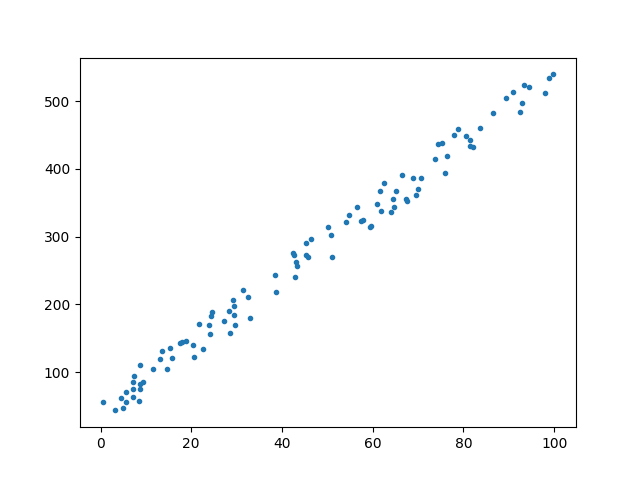

In [1]:
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()

x = (np.random.random([100,1])*100).reshape(-1,1)
m = 5;
b = 40
y= m*(x) + b
y = y+y.mean()*0.2*(np.random.random((y.shape))-0.5)

plt.plot(x,y,".")
plt.show()

<IPython.core.display.Javascript object>


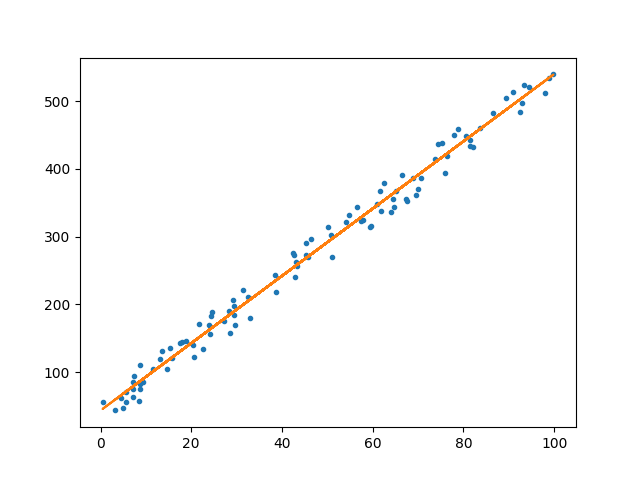

----
m =  5
w_1 =  [4.96102806]
b =  40
w_0 =  [43.61249744]


In [2]:
R = np.hstack([np.ones((x.shape)).reshape(-1,1),x])

#w_fit = (R^TR)^{-1}R^Ty
y_intermediate = np.matmul(R.T,y)
w_fit = np.matmul(np.linalg.inv(np.matmul(R.T,R)),y_intermediate)

y_fit = w_fit[0]+w_fit[1]*x

fig = plt.figure()
plt.plot(x,y,".")
plt.plot(x,y_fit,"-")
plt.show()

print("----")
print("m = ", m)
print("w_1 = ", w_fit[1])
print("b = ", b)
print("w_0 = ", w_fit[0])

Agora usando o sklearn:

In [8]:
import sklearn.linear_model as lm

lr = lm.LinearRegression()
data=lr.fit(x,y)
w_fit = []
w_fit.append(data.intercept_)
w_fit.append(data.coef_)

print("----")
print("m = ", m)
print("w_1 = ", w_fit[1])
print("b = ", b)
print("w_0 = ", w_fit[0])

----
m =  5
w_1 =  [[-0.25177884]]
b =  40
w_0 =  [1.50894706]


/Users/nbb/.local/share/virtualenvs/code-JDvErFti/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


---

# Multi-Linear Regression
---

O modelo de Regressão Linear considera que existe numa primeira aproximação, uma dependência linear das diversas features. Mas como temos $D$ features, a nossa nova função $M$, fica:

$$ M(w, r) = w_0 + w_1x_1 + w_2x_2 + ... + w_Dx_D$$

ou seja, linear para cada feature.

Vamos ver um exemplo com $D=2$

In [ ]:
x = np.random.random_sample([1000,2])*20-10
x[:10,:5]


In [ ]:
x_with_offset = np.hstack([np.ones((x.shape[0],1)),x])

w = [10,5,-3]#, -8, 1, -6,12,3,9,2]

y = np.dot(x_with_offset,w)

# 30% Error!!!
y = y+.3*y.mean()*(np.random.random(y.shape)-0.5)
#print(y.shape)


In [ ]:

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x[:,0],x[:,1], y, c="black", s=1)
plt.show()

In [ ]:
lr = lm.LinearRegression()
data=lr.fit(x,y)
w_fit = np.array(data.coef_)
w_fit = np.concatenate([np.array([data.intercept_]),w_fit]).reshape(-1,3)


In [ ]:
print("----")
print("w original = ", w)
print("w_fit = ", w_fit)

In [ ]:
y_fit = w_fit[0,0] + np.matmul(w_fit[:,1:],x.T)
y_fit.shape

### Vamos visualizar o fit que encontrámos:
---

In [ ]:

X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X,Y = np.meshgrid(X, Y)
S = np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)], axis=1)
S.shape

Y_FIT = w_fit[0,0] + np.matmul(w_fit[:,1:],S.T)


In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x[:,0],x[:,1], y, c="black", s=1)
surf = ax.plot_wireframe(X, Y, Y_FIT.reshape(X.shape), rstride=3, cstride=3)
plt.show()

### Como medir o erro?


O erro pode medir-se com o valor da função de custo:

$$Cost = \underset{w}{\text{min}} \space\space \frac{1}{2}\sum_i^N{(\hat{y}_i-y_i)^2}$$ 

ou seja, calculando de facto a soma dos erros para os diversos pontos de treino ou mesmo para um conjunto de pontos de teste.

Neste último caso teríamos, usando a descrição matricial, por exemplo o erro em fase de treino dado por - Root Mean Square Error:


$$RMSE_{train} = \space\space \sqrt{\frac{{||\textbf{R} \textbf{w}-\textbf{y}||^2}}{N}}$$ 

In [ ]:
S = (((y-y_fit)**2).sum()/y.shape[0])**0.5
S



# General Linear Regression (Regressão Linear Geral)
---






Vamos usar um polinómio de 3ª ordem para fazer fit de uma função coseno, ou seja, o modelo $M$ é dado por algo como:


$$ M(w, r) = w_0 + w_1x_1 + ... + w_2(x_1)^2 + ... +  w_j(x_D)^2 + w_{j+1}(x_1)^3 + ...  $$

$$ M(w, z) = w_0 + w_1z_1 + w_3z_2 + ... +  w_jz_3 + w_{j+1}z_4 + ...  $$

repare-se que a lógica linear em termos dos parâmetros $w$ se mantém.



<IPython.core.display.Javascript object>


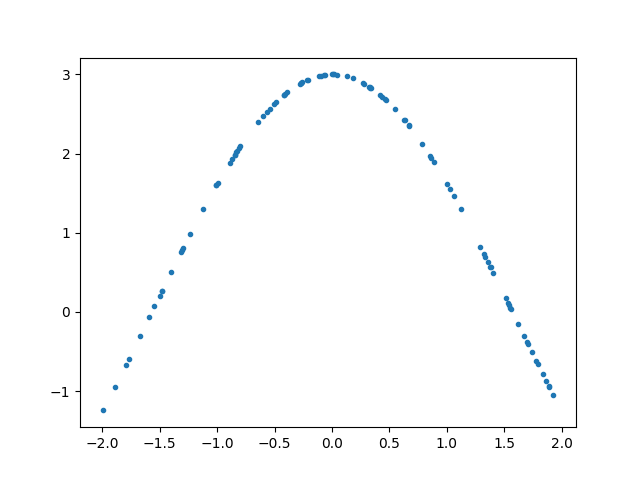

<function matplotlib.pyplot.show(*args, **kw)>

In [6]:
x = np.random.random_sample([100,1])*4-2

y= 3*(np.cos(x)+0.0*(np.random.random((x.shape[0],1))-0.5)).reshape(-1,1)

fig = plt.figure()

plt.plot(x,y,".")
plt.show

In [9]:
lr = lm.LinearRegression()

x_2 = x**2
x_3 = x**3
X = np.concatenate([x,x_2,x_3], axis=1)

In [10]:
lr.fit (X,y)
lr.coef_


y_fit = np.matmul(X, lr.coef_.T) + lr.intercept_

A = [(x_,y_f_, y_) for x_,y_f_,y_ in zip(x,y_fit,y)]

A = sorted(A, key=lambda a: a[0])
x = [a[0] for a in A]
y = [a[2] for a in A]
y_fit = [a[1] for a in A]


<IPython.core.display.Javascript object>


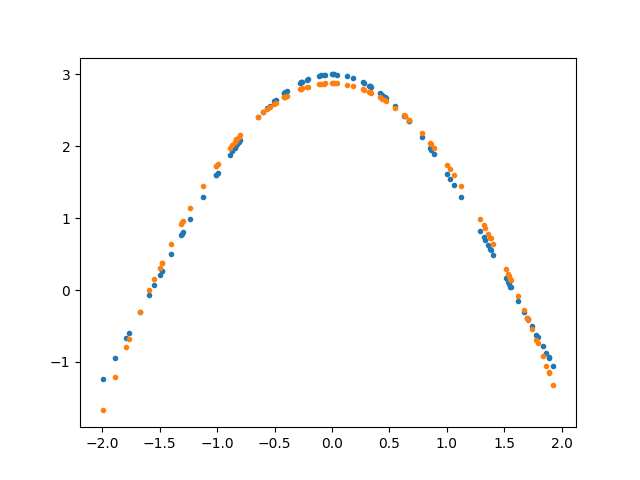

In [12]:
fig = plt.figure()

plt.plot(x,y,".")

plt.plot(x,y_fit,".")
plt.show()